In [10]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)

For both lambda = 0.01 and 0.08 do:
- Do Minimal basis pCQED (Nel = 2, Np = 2)
- Do large basis pCQED (Nel = 50, Np = 10)
- Do minimal basis QED-FCI (Np = 1)
- Do large basis QED-FCI (Np = 6)

In [2]:
# options for mgf
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}


psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)


In [17]:
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

pcqed_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 0
}

scqed_dict_np1 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.04]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 1
}

scqed_dict_np6 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.05]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 4
}

nam_dict = {
    'omega_value' :0.12086,
    'lambda_vector' : np.array([0, 0, 0.05]),
    'ci_level' : 'fci',
    'ignore_coupling' : False,
    'number_of_photons' : 4,
    'natural_orbitals' : False,
    #'davidson_roots' : 6,
    #'davidson_maxiter' : 1000,
    'full_diagonalization': True,
    #'davidson_guess' : 'random guess',
    #'rdm_weights': np.array([1,1,1,1]),
    #'davidson_maxdim':12,
    'nact_orbs' : 6,
    'nact_els' : 4
}

mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)

pcqed_res = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    pcqed_dict
)

scqed_res_np1 = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    scqed_dict_np1
)

scqed_res_np6 = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    scqed_dict_np6
)

nam_res = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    nam_dict
)

print(np.shape(pcqed_res.H_PF))
print(scqed_res_np6.CIeigs[:4])
#print(np.array([-7.88008428, -7.76164001, -7.75794985, -7.73889517]))

nam = np.array([-7.878498180482292,
-7.866523242797082,
 -7.854551815072677,
 -7.8425729629270755,
 -7.830301292414112,
-7.755660842853401])




Start SCF iterations:

Canonical RHF One-electron energy = -12.5626302721254959
CQED-RHF One-electron energy      = -12.5626302721254959
Nuclear repulsion energy          = 1.0583544213400000
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633576215383263   dE = -7.86336E+00   dRMS = 3.54673E-13
SCF Iteration   2: Energy = -7.8633576215383370   dE = -1.06581E-14   dRMS = 7.99578E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86335762 hartree
Psi4  SCF energy: -7.86335762 hartree
 Completed QED-RHF in 0.12322306632995605 seconds
 Completed 1HSO Build in 4.982948303222656e-05 seconds
 Completed ERI Build in 0.0011429786682128906 seconds 
 Completed 2D build in 7.915496826171875e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 3.790855407714844e-05 seconds
 Completed determinant list in 0.0004410743713378906 seconds 
 Completed constant offset matrix in 5.388259887695312

In [18]:
print(nam_res.CIeigs[:6])
print(nam)
assert np.allclose(scqed_res_np6.CIeigs[:6], nam_res.CIeigs[:6])

[-7.8788027  -7.761456   -7.75645507 -7.73615987 -7.70835283 -7.70835283]
[-7.87849818 -7.86652324 -7.85455182 -7.84257296 -7.83030129 -7.75566084]


In [4]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 50
N_el = 70
r_array = np.linspace(1.4, 2.2, N_R)

# for pcqed results
E_array = np.zeros((N_R, N_el))
Mu_array = np.zeros((N_R, N_el, N_el, 3))

# scqed results
sc_np1_E_array = np.zeros((N_R, 10))
sc_np6_E_array = np.zeros((N_R, 10))

psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy = psi4.energy('fci',ref_wfn=wfn)
    
    # pcqed results
    pcqed_res = PFHamiltonianGenerator(mol_str, options_dict, pcqed_dict)
    assert np.isclose(fci_energy, pcqed_res.CIeigs[0], 1e-7)
    
    # sort out states with dipole-allowed transition from ground state
    singlet_states = pcqed_res.sort_dipole_allowed_states( N_el)
    
    # store values
    E_array[r_idx, :] = pcqed_res.CIeigs[singlet_states]
    Mu_array[r_idx, :, :, :] = pcqed_res.compute_dipole_moments(singlet_states)
    
    # scqed results
    cqed_res_np1 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np1)
    sc_np1_E_array[r_idx, :] = cqed_res_np1.CIeigs[:10]
    
    cqed_res_np6 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np6)
    sc_np6_E_array[r_idx, :] = cqed_res_np6.CIeigs[:10]
    

    
    r_idx += 1




Li
H 1 1.4
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6946346236295895
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570385   dE = -7.86054E+00   dRMS = 1.78770E-13
SCF Iteration   2: Energy = -7.8605386610570473   dE = -8.88178E-15   dRMS = 3.97284E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.0931241512298584 seconds
 Completed 1HSO Build in 5.030632019042969e-05 seconds
 Completed ERI Build in 0.0011379718780517578 seconds 
 Completed 2D build in 7.176399230957031e-05 seconds
 Completed 1G build in 1.3113021850585938e-05 seconds
 Completed the Dipole Matrix Build in 3.886222839355469e-05 seconds
 Completed determinant list in 0.0004467964172363281 seconds 
 Completed constant offset mat

 Completed 1HSO Build in 5.888938903808594e-05 seconds
 Completed ERI Build in 0.0012700557708740234 seconds 
 Completed 2D build in 0.0002219676971435547 seconds
 Completed 1G build in 1.8835067749023438e-05 seconds
 Completed the Dipole Matrix Build in 4.1961669921875e-05 seconds
 Completed determinant list in 0.00048804283142089844 seconds 
 Completed constant offset matrix in 9.894371032714844e-05 seconds
 Completed Hamiltonian build in 0.6897661685943604 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6504263033321447
CQED-RHF One-electron energy      = -12.6414987616432839
Nuclear repulsion energy          = 1.1081061249072652
Dipole energy                     = 0.0084286518632954
SCF Iteration   1: Energy = -7.8594980795319858   dE = -7.85950E+00   dRMS = 2.04489E-04
SCF Iteration   2: Energy = -7.8595002503393987   dE = -2.17081E-06   dRMS = 2.88828E-05
SCF Iteration   3: Energy = -7.8595003561322985   dE = -1.05793E-07   dRMS = 1.08259E-05
SCF Iteration

 Completed Hamiltonian build in 0.6836552619934082 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6073028869779655
CQED-RHF One-electron energy      = -12.5981718171095913
Nuclear repulsion energy          = 1.0834129522073814
Dipole energy                     = 0.0085989274679917
SCF Iteration   1: Energy = -7.8603730601399748   dE = -7.86037E+00   dRMS = 2.04656E-04
SCF Iteration   2: Energy = -7.8603753983369140   dE = -2.33820E-06   dRMS = 3.31722E-05
SCF Iteration   3: Energy = -7.8603755506477357   dE = -1.52311E-07   dRMS = 1.29919E-05
SCF Iteration   4: Energy = -7.8603755797598032   dE = -2.91121E-08   dRMS = 1.68347E-07
SCF Iteration   5: Energy = -7.8603755797610981   dE = -1.29496E-12   dRMS = 2.55437E-09
SCF Iteration   6: Energy = -7.8603755797610981   dE =  0.00000E+00   dRMS = 9.79614E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.86037558 hartree
Psi4  SCF energy: -7.86293298 hartree
 Completed QED-RHF in 0.087658166885

 Completed Hamiltonian build in 0.6771388053894043 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5652261719185372
CQED-RHF One-electron energy      = -12.5558860311410534
Nuclear repulsion energy          = 1.0597963210965946
Dipole energy                     = 0.0087723707612136
SCF Iteration   1: Energy = -7.8607403726079497   dE = -7.86074E+00   dRMS = 2.05663E-04
SCF Iteration   2: Energy = -7.8607429219162306   dE = -2.54931E-06   dRMS = 3.78463E-05
SCF Iteration   3: Energy = -7.8607431321157168   dE = -2.10199E-07   dRMS = 1.50576E-05
SCF Iteration   4: Energy = -7.8607431711546081   dE = -3.90389E-08   dRMS = 2.11908E-07
SCF Iteration   5: Energy = -7.8607431711570577   dE = -2.44960E-12   dRMS = 3.48447E-09
SCF Iteration   6: Energy = -7.8607431711570612   dE = -3.55271E-15   dRMS = 1.25493E-10
SCF Iteration   7: Energy = -7.8607431711570577   dE =  3.55271E-15   dRMS = 5.39341E-14
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.86

 Completed Hamiltonian build in 0.673112154006958 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5241587898228026
CQED-RHF One-electron energy      = -12.5146039388324315
Nuclear repulsion energy          = 1.0371873329132002
Dipole energy                     = 0.0089490580800897
SCF Iteration   1: Energy = -7.8606455083082150   dE = -7.86065E+00   dRMS = 2.07525E-04
SCF Iteration   2: Energy = -7.8606483151052764   dE = -2.80680E-06   dRMS = 4.28178E-05
SCF Iteration   3: Energy = -7.8606485955646779   dE = -2.80459E-07   dRMS = 1.70247E-05
SCF Iteration   4: Energy = -7.8606486454264033   dE = -4.98617E-08   dRMS = 2.57747E-07
SCF Iteration   5: Energy = -7.8606486454304143   dE = -4.01101E-12   dRMS = 4.30796E-09
SCF Iteration   6: Energy = -7.8606486454304161   dE = -1.77636E-15   dRMS = 1.55662E-10
SCF Iteration   7: Energy = -7.8606486454304143   dE =  1.77636E-15   dRMS = 9.73551E-14
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.860

 Completed Hamiltonian build in 0.6705617904663086 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4840645825417127
CQED-RHF One-electron energy      = -12.4742892874329048
Nuclear repulsion energy          = 1.0155228455416452
Dipole energy                     = 0.0091290505195096
SCF Iteration   1: Energy = -7.8601298195644818   dE = -7.86013E+00   dRMS = 2.10250E-04
SCF Iteration   2: Energy = -7.8601329332652723   dE = -3.11370E-06   dRMS = 4.80352E-05
SCF Iteration   3: Energy = -7.8601332974540279   dE = -3.64189E-07   dRMS = 1.88983E-05
SCF Iteration   4: Energy = -7.8601333588956921   dE = -6.14417E-08   dRMS = 3.05033E-07
SCF Iteration   5: Energy = -7.8601333589016784   dE = -5.98632E-12   dRMS = 5.08787E-09
SCF Iteration   6: Energy = -7.8601333589016713   dE =  7.10543E-15   dRMS = 1.88654E-10
SCF Iteration   7: Energy = -7.8601333589016784   dE = -7.10543E-15   dRMS = 1.60323E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.86

 Completed Hamiltonian build in 0.673367977142334 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4449088519790934
CQED-RHF One-electron energy      = -12.4349072882787723
Nuclear repulsion energy          = 0.9947448845075447
Dipole energy                     = 0.0093123930221470
SCF Iteration   1: Energy = -7.8592309564562699   dE = -7.85923E+00   dRMS = 2.13840E-04
SCF Iteration   2: Energy = -7.8592344298830179   dE = -3.47343E-06   dRMS = 5.34686E-05
SCF Iteration   3: Energy = -7.8592348924543751   dE = -4.62571E-07   dRMS = 2.06863E-05
SCF Iteration   4: Energy = -7.8592349661420888   dE = -7.36877E-08   dRMS = 3.53723E-07
SCF Iteration   5: Energy = -7.8592349661505070   dE = -8.41816E-12   dRMS = 5.85742E-09
SCF Iteration   6: Energy = -7.8592349661505034   dE =  3.55271E-15   dRMS = 2.24682E-10
SCF Iteration   7: Energy = -7.8592349661504999   dE =  3.55271E-15   dRMS = 2.47780E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.859

 Completed Hamiltonian build in 0.6717672348022461 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4066585131691234
CQED-RHF One-electron energy      = -12.3964247713870979
Nuclear repulsion energy          = 0.9748001249184212
Dipole energy                     = 0.0094991139529600
SCF Iteration   1: Energy = -7.8579832458820702   dE = -7.85798E+00   dRMS = 2.18289E-04
SCF Iteration   2: Energy = -7.8579871356236835   dE = -3.88974E-06   dRMS = 5.91011E-05
SCF Iteration   3: Energy = -7.8579877124929149   dE = -5.76869E-07   dRMS = 2.23986E-05
SCF Iteration   4: Energy = -7.8579877990509130   dE = -8.65580E-08   dRMS = 4.04097E-07
SCF Iteration   5: Energy = -7.8579877990622604   dE = -1.13474E-11   dRMS = 6.63687E-09
SCF Iteration   6: Energy = -7.8579877990622657   dE = -5.32907E-15   dRMS = 2.64214E-10
SCF Iteration   7: Energy = -7.8579877990622640   dE =  1.77636E-15   dRMS = 3.66994E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6728010177612305 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3692821733550495
CQED-RHF One-electron energy      = -12.3588102656111758
Nuclear repulsion energy          = 0.9556394345023342
Dipole energy                     = 0.0096892250332060
SCF Iteration   1: Energy = -7.8564180223016553   dE = -7.85642E+00   dRMS = 2.23583E-04
SCF Iteration   2: Energy = -7.8564223890646918   dE = -4.36676E-06   dRMS = 6.49236E-05
SCF Iteration   3: Energy = -7.8564230974837255   dE = -7.08419E-07   dRMS = 2.40470E-05
SCF Iteration   4: Energy = -7.8564231975423322   dE = -1.00059E-07   dRMS = 4.56574E-07
SCF Iteration   5: Energy = -7.8564231975572252   dE = -1.48930E-11   dRMS = 7.44076E-09
SCF Iteration   6: Energy = -7.8564231975572270   dE = -1.77636E-15   dRMS = 3.08088E-10
SCF Iteration   7: Energy = -7.8564231975572287   dE = -1.77636E-15   dRMS = 5.28423E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6787912845611572 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3327501550001326
CQED-RHF One-electron energy      = -12.3220340223763802
Nuclear repulsion energy          = 0.9372174694998797
Dipole energy                     = 0.0098827215265443
SCF Iteration   1: Energy = -7.8545639179362201   dE = -7.85456E+00   dRMS = 2.29706E-04
SCF Iteration   2: Energy = -7.8545688268899578   dE = -4.90895E-06   dRMS = 7.09320E-05
SCF Iteration   3: Energy = -7.8545696855207936   dE = -8.58631E-07   dRMS = 2.56443E-05
SCF Iteration   4: Energy = -7.8545697997621371   dE = -1.14241E-07   dRMS = 5.11644E-07
SCF Iteration   5: Energy = -7.8545697997812720   dE = -1.91349E-11   dRMS = 8.28118E-09
SCF Iteration   6: Energy = -7.8545697997812773   dE = -5.32907E-15   dRMS = 3.57614E-10
SCF Iteration   7: Energy = -7.8545697997812702   dE =  7.10543E-15   dRMS = 7.47693E-13
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6872129440307617 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2970344769079389
CQED-RHF One-electron energy      = -12.2860679972472830
Nuclear repulsion energy          = 0.9194923164124112
Dipole energy                     = 0.0100795825831129
SCF Iteration   1: Energy = -7.8524471188062055   dE = -7.85245E+00   dRMS = 2.36633E-04
SCF Iteration   2: Energy = -7.8524526399249872   dE = -5.52112E-06   dRMS = 7.71252E-05
SCF Iteration   3: Energy = -7.8524536689140749   dE = -1.02899E-06   dRMS = 2.72041E-05
SCF Iteration   4: Energy = -7.8524537981148761   dE = -1.29201E-07   dRMS = 5.69832E-07
SCF Iteration   5: Energy = -7.8524537981391145   dE = -2.42384E-11   dRMS = 9.16949E-09
SCF Iteration   6: Energy = -7.8524537981391180   dE = -3.55271E-15   dRMS = 4.14667E-10
SCF Iteration   7: Energy = -7.8524537981391180   dE =  0.00000E+00   dRMS = 1.04660E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6779530048370361 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2621088047830202
CQED-RHF One-electron energy      = -12.2508858007167003
Nuclear repulsion energy          = 0.9024251736483759
Dipole energy                     = 0.0102797716650995
SCF Iteration   1: Energy = -7.8500915918259144   dE = -7.85009E+00   dRMS = 2.44340E-04
SCF Iteration   2: Energy = -7.8500978002328372   dE = -6.20841E-06   dRMS = 8.35041E-05
SCF Iteration   3: Energy = -7.8500990212876038   dE = -1.22105E-06   dRMS = 2.87404E-05
SCF Iteration   4: Energy = -7.8500991663594641   dE = -1.45072E-07   dRMS = 6.31688E-07
SCF Iteration   5: Energy = -7.8500991663898452   dE = -3.03810E-11   dRMS = 1.01174E-08
SCF Iteration   6: Energy = -7.8500991663898452   dE =  0.00000E+00   dRMS = 4.81804E-10
SCF Iteration   7: Energy = -7.8500991663898469   dE = -1.77636E-15   dRMS = 1.45812E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.85

 Completed Hamiltonian build in 0.6840829849243164 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2279483802846354
CQED-RHF One-electron energy      = -12.2164626273190731
Nuclear repulsion energy          = 0.8859800679782459
Dipole energy                     = 0.0104832369912046
SCF Iteration   1: Energy = -7.8475192872300186   dE = -7.84752E+00   dRMS = 2.52798E-04
SCF Iteration   2: Energy = -7.8475262635466043   dE = -6.97632E-06   dRMS = 9.00713E-05
SCF Iteration   3: Energy = -7.8475277000151840   dE = -1.43647E-06   dRMS = 3.02674E-05
SCF Iteration   4: Energy = -7.8475278620429902   dE = -1.62028E-07   dRMS = 6.97776E-07
SCF Iteration   5: Energy = -7.8475278620807822   dE = -3.77920E-11   dRMS = 1.11377E-08
SCF Iteration   6: Energy = -7.8475278620807822   dE =  0.00000E+00   dRMS = 5.62384E-10
SCF Iteration   7: Energy = -7.8475278620807840   dE = -1.77636E-15   dRMS = 2.02818E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.84

 Completed Hamiltonian build in 0.6817982196807861 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1945299358207144
CQED-RHF One-electron energy      = -12.1827751703552529
Nuclear repulsion energy          = 0.8701236014372483
Dipole energy                     = 0.0106899119528135
SCF Iteration   1: Energy = -7.8447503198465256   dE = -7.84475E+00   dRMS = 2.61981E-04
SCF Iteration   2: Energy = -7.8447581505539308   dE = -7.83071E-06   dRMS = 9.68300E-05
SCF Iteration   3: Energy = -7.8447598275089323   dE = -1.67696E-06   dRMS = 3.17992E-05
SCF Iteration   4: Energy = -7.8447600077884108   dE = -1.80279E-07   dRMS = 7.68680E-07
SCF Iteration   5: Energy = -7.8447600078351414   dE = -4.67306E-11   dRMS = 1.22457E-08
SCF Iteration   6: Energy = -7.8447600078351467   dE = -5.32907E-15   dRMS = 6.60713E-10
SCF Iteration   7: Energy = -7.8447600078351414   dE =  5.32907E-15   dRMS = 2.82450E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.84

 Completed Hamiltonian build in 0.6805939674377441 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1618316008527625
CQED-RHF One-electron energy      = -12.1498015280318050
Nuclear repulsion energy          = 0.8548247249284615
Dipole energy                     = 0.0108997154691092
SCF Iteration   1: Energy = -7.8418031321241255   dE = -7.84180E+00   dRMS = 2.71859E-04
SCF Iteration   2: Energy = -7.8418119099416472   dE = -8.77782E-06   dRMS = 1.03785E-04
SCF Iteration   3: Energy = -7.8418138542686560   dE = -1.94433E-06   dRMS = 3.33499E-05
SCF Iteration   4: Energy = -7.8418140543442156   dE = -2.00076E-07   dRMS = 8.44993E-07
SCF Iteration   5: Energy = -7.8418140544017803   dE = -5.75646E-11   dRMS = 1.34597E-08
SCF Iteration   6: Energy = -7.8418140544017803   dE =  0.00000E+00   dRMS = 7.82204E-10
SCF Iteration   7: Energy = -7.8418140544017749   dE =  5.32907E-15   dRMS = 3.94186E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.84

 Completed Hamiltonian build in 0.6781032085418701 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1298328042598946
CQED-RHF One-electron energy      = -12.1175211055882048
Nuclear repulsion energy          = 0.8400545352968682
Dipole energy                     = 0.0111125522619903
SCF Iteration   1: Energy = -7.8386946413355343   dE = -7.83869E+00   dRMS = 2.82407E-04
SCF Iteration   2: Energy = -7.8387044656225449   dE = -9.82429E-06   dRMS = 1.10940E-04
SCF Iteration   3: Energy = -7.8387067061141043   dE = -2.24049E-06   dRMS = 3.49332E-05
SCF Iteration   4: Energy = -7.8387069278183059   dE = -2.21704E-07   dRMS = 9.27323E-07
SCF Iteration   5: Energy = -7.8387069278889943   dE = -7.06883E-11   dRMS = 1.48025E-08
SCF Iteration   6: Energy = -7.8387069278889925   dE =  1.77636E-15   dRMS = 9.33574E-10
SCF Iteration   7: Energy = -7.8387069278889996   dE = -7.10543E-15   dRMS = 5.51661E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.83

 Completed Hamiltonian build in 0.671057939529419 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0985141762878570
CQED-RHF One-electron energy      = -12.0859145169576436
Nuclear repulsion energy          = 0.8257860930837581
Dipole energy                     = 0.0113283130441322
SCF Iteration   1: Energy = -7.8354403729876800   dE = -7.83544E+00   dRMS = 2.93600E-04
SCF Iteration   2: Energy = -7.8354513501750453   dE = -1.09772E-05   dRMS = 1.18303E-04
SCF Iteration   3: Energy = -7.8354539176305149   dE = -2.56746E-06   dRMS = 3.65628E-05
SCF Iteration   4: Energy = -7.8354541631263555   dE = -2.45496E-07   dRMS = 1.01629E-06
SCF Iteration   5: Energy = -7.8354541632129742   dE = -8.66187E-11   dRMS = 1.63032E-08
SCF Iteration   6: Energy = -7.8354541632129848   dE = -1.06581E-14   dRMS = 1.12309E-09
SCF Iteration   7: Energy = -7.8354541632129777   dE =  7.10543E-15   dRMS = 7.73805E-12
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.835

 Completed Hamiltonian build in 0.667396068572998 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0678574527474929
CQED-RHF One-electron energy      = -12.0549634886407731
Nuclear repulsion energy          = 0.8119942585437370
Dipole energy                     = 0.0115468746245430
SCF Iteration   1: Energy = -7.8320545821503424   dE = -7.83205E+00   dRMS = 3.05417E-04
SCF Iteration   2: Energy = -7.8320668262069661   dE = -1.22441E-05   dRMS = 1.25880E-04
SCF Iteration   3: Energy = -7.8320697535387476   dE = -2.92733E-06   dRMS = 3.82521E-05
SCF Iteration   4: Energy = -7.8320700253660691   dE = -2.71827E-07   dRMS = 1.11254E-06
SCF Iteration   5: Energy = -7.8320700254720270   dE = -1.05958E-10   dRMS = 1.79982E-08
SCF Iteration   6: Energy = -7.8320700254720323   dE = -5.32907E-15   dRMS = 1.36088E-09
SCF Iteration   7: Energy = -7.8320700254720359   dE = -3.55271E-15   dRMS = 1.08702E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.832

 Completed Hamiltonian build in 0.681138277053833 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0378453834023116
CQED-RHF One-electron energy      = -12.0246507677427950
Nuclear repulsion energy          = 0.7986555438243326
Dipole energy                     = 0.0117680999453248
SCF Iteration   1: Energy = -7.8285503641515914   dE = -7.82855E+00   dRMS = 3.17837E-04
SCF Iteration   2: Energy = -7.8285639970909804   dE = -1.36329E-05   dRMS = 1.33677E-04
SCF Iteration   3: Energy = -7.8285673194370213   dE = -3.32235E-06   dRMS = 4.00144E-05
SCF Iteration   4: Energy = -7.8285676205642529   dE = -3.01127E-07   dRMS = 1.21672E-06
SCF Iteration   5: Energy = -7.8285676206936943   dE = -1.29441E-10   dRMS = 1.99335E-08
SCF Iteration   6: Energy = -7.8285676206937032   dE = -8.88178E-15   dRMS = 1.65940E-09
SCF Iteration   7: Energy = -7.8285676206937049   dE = -1.77636E-15   dRMS = 1.52758E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.828

 Completed Hamiltonian build in 0.6743118762969971 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0084616458771674
CQED-RHF One-electron energy      = -11.9949600355135804
Nuclear repulsion energy          = 0.7857479794796969
Dipole energy                     = 0.0119918380709028
SCF Iteration   1: Energy = -7.8249397558679439   dE = -7.82494E+00   dRMS = 3.30845E-04
SCF Iteration   2: Energy = -7.8249549082986265   dE = -1.51524E-05   dRMS = 1.41705E-04
SCF Iteration   3: Energy = -7.8249586631410066   dE = -3.75484E-06   dRMS = 4.18630E-05
SCF Iteration   4: Energy = -7.8249589970233293   dE = -3.33882E-07   dRMS = 1.32949E-06
SCF Iteration   5: Energy = -7.8249589971812918   dE = -1.57963E-10   dRMS = 2.21657E-08
SCF Iteration   6: Energy = -7.8249589971813096   dE = -1.77636E-14   dRMS = 2.03400E-09
SCF Iteration   7: Energy = -7.8249589971813132   dE = -3.55271E-15   dRMS = 2.14359E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.82

 Completed Hamiltonian build in 0.6769909858703613 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9796907659129843
CQED-RHF One-electron energy      = -11.9658758272205361
Nuclear repulsion energy          = 0.7732509937225647
Dipole energy                     = 0.0122179241566841
SCF Iteration   1: Energy = -7.8212338286481184   dE = -7.82123E+00   dRMS = 3.44429E-04
SCF Iteration   2: Energy = -7.8212506403700832   dE = -1.68117E-05   dRMS = 1.49972E-04
SCF Iteration   3: Energy = -7.8212548676586824   dE = -4.22729E-06   dRMS = 4.38110E-05
SCF Iteration   4: Energy = -7.8212552383039871   dE = -3.70645E-07   dRMS = 1.45155E-06
SCF Iteration   5: Energy = -7.8212552384965708   dE = -1.92584E-10   dRMS = 2.47637E-08
SCF Iteration   6: Energy = -7.8212552384965939   dE = -2.30926E-14   dRMS = 2.50371E-09
SCF Iteration   7: Energy = -7.8212552384965974   dE = -3.55271E-15   dRMS = 2.99671E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.82

 Completed Hamiltonian build in 0.6740803718566895 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9515180443788989
CQED-RHF One-electron energy      = -11.9373834587684016
Nuclear repulsion energy          = 0.7611453030184931
Dipole energy                     = 0.0124461794278899
SCF Iteration   1: Energy = -7.8174427737485139   dE = -7.81744E+00   dRMS = 3.58577E-04
SCF Iteration   2: Energy = -7.8174613943963429   dE = -1.86206E-05   dRMS = 1.58488E-04
SCF Iteration   3: Energy = -7.8174661366762503   dE = -4.74228E-06   dRMS = 4.58717E-05
SCF Iteration   4: Energy = -7.8174665487197608   dE = -4.12044E-07   dRMS = 1.58361E-06
SCF Iteration   5: Energy = -7.8174665489543589   dE = -2.34598E-10   dRMS = 2.78093E-08
SCF Iteration   6: Energy = -7.8174665489543944   dE = -3.55271E-14   dRMS = 3.09234E-09
SCF Iteration   7: Energy = -7.8174665489543926   dE =  1.77636E-15   dRMS = 4.15977E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.81

 Completed Hamiltonian build in 0.6849002838134766 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9239294911210880
CQED-RHF One-electron energy      = -11.9094689601460697
Nuclear repulsion energy          = 0.7494128127985549
Dipole energy                     = 0.0126764112021378
SCF Iteration   1: Energy = -7.8135759810185643   dE = -7.81358E+00   dRMS = 3.73285E-04
SCF Iteration   2: Energy = -7.8135965707495441   dE = -2.05897E-05   dRMS = 1.67266E-04
SCF Iteration   3: Energy = -7.8136018732898425   dE = -5.30254E-06   dRMS = 4.80585E-05
SCF Iteration   4: Energy = -7.8136023320786645   dE = -4.58789E-07   dRMS = 1.72640E-06
SCF Iteration   5: Energy = -7.8136023323642085   dE = -2.85544E-10   dRMS = 3.13976E-08
SCF Iteration   6: Energy = -7.8136023323642547   dE = -4.61853E-14   dRMS = 3.82992E-09
SCF Iteration   7: Energy = -7.8136023323642565   dE = -1.77636E-15   dRMS = 5.70612E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.81

 Completed Hamiltonian build in 0.675731897354126 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.8969117654642922
CQED-RHF One-electron energy      = -11.8821190155168956
Nuclear repulsion energy          = 0.7380365272152751
Dipole energy                     = 0.0129084129881277
SCF Iteration   1: Energy = -7.8096421114527121   dE = -7.80964E+00   dRMS = 3.88547E-04
SCF Iteration   2: Energy = -7.8096648416759109   dE = -2.27302E-05   dRMS = 1.76317E-04
SCF Iteration   3: Energy = -7.8096707525970324   dE = -5.91092E-06   dRMS = 5.03848E-05
SCF Iteration   4: Energy = -7.8096712642856030   dE = -5.11689E-07   dRMS = 1.88070E-06
SCF Iteration   5: Energy = -7.8096712646328736   dE = -3.47271E-10   dRMS = 3.56372E-08
SCF Iteration   6: Energy = -7.8096712646329447   dE = -7.10543E-14   dRMS = 4.75474E-09
SCF Iteration   7: Energy = -7.8096712646329465   dE = -1.77636E-15   dRMS = 7.68261E-11
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.809

 Completed Hamiltonian build in 0.6692211627960205 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.8704521229909687
CQED-RHF One-electron energy      = -11.8553209095768608
Nuclear repulsion energy          = 0.7270004669952337
Dipole energy                     = 0.0131419646921871
SCF Iteration   1: Energy = -7.8056491641215970   dE = -7.80565E+00   dRMS = 4.04363E-04
SCF Iteration   2: Energy = -7.8056742182616485   dE = -2.50541E-05   dRMS = 1.85656E-04
SCF Iteration   3: Energy = -7.8056807886575612   dE = -6.57040E-06   dRMS = 5.28644E-05
SCF Iteration   4: Energy = -7.8056813603150292   dE = -5.71657E-07   dRMS = 2.04732E-06
SCF Iteration   5: Energy = -7.8056813607370170   dE = -4.21988E-10   dRMS = 4.06491E-08
SCF Iteration   6: Energy = -7.8056813607371218   dE = -1.04805E-13   dRMS = 5.91617E-09
SCF Iteration   7: Energy = -7.8056813607371289   dE = -7.10543E-15   dRMS = 1.00572E-10
SCF Iteration   8: Energy = -7.8056813607371236   dE =  5.32907E-15   

In [5]:
from matplotlib import pyplot as plt

safe_np1_1 = np.copy(sc_np1_E_array[:,1])
safe_np1_2 = np.copy(sc_np1_E_array[:,2])

safe_np6_1 = np.copy(sc_np6_E_array[:,1])
safe_np6_2 = np.copy(sc_np6_E_array[:,2])





In [6]:
sc_np1_E_array[:,1] = np.copy(safe_np1_1)
sc_np1_E_array[:,2] = np.copy(safe_np1_2)

sc_np6_E_array[:,1] = np.copy(safe_np6_1)
sc_np6_E_array[:,2] = np.copy(safe_np6_2)


In [7]:
np_1_lp = np.copy(sc_np1_E_array[:11,1])
np_1_up = np.copy(sc_np1_E_array[:11,2])

np_6_lp = np.copy(sc_np6_E_array[:11,1])
np_6_up = np.copy(sc_np6_E_array[:11,2])



In [8]:
sc_np1_E_array[:11,1] = np.copy(np_1_up)
sc_np1_E_array[:11,2] = np.copy(np_1_lp)

sc_np6_E_array[:11,1] = np.copy(np_6_up)
sc_np6_E_array[:11,2] = np.copy(np_6_lp)

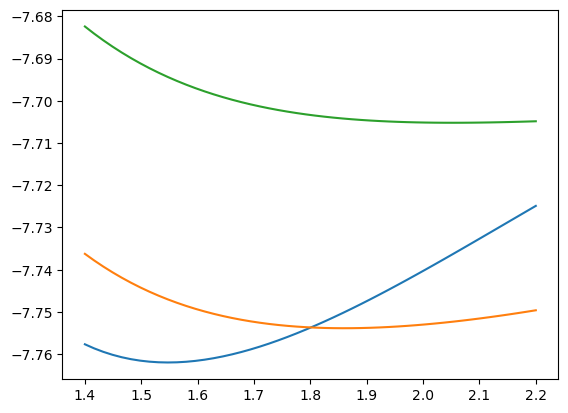

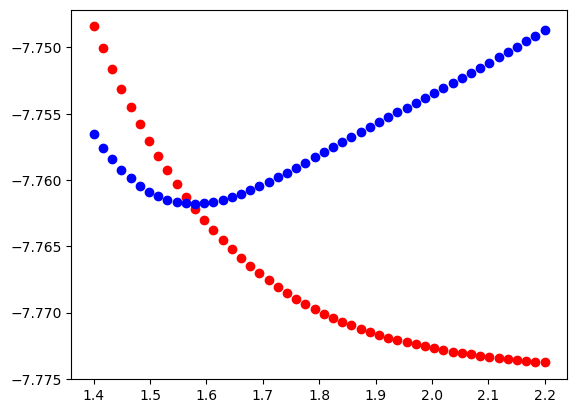

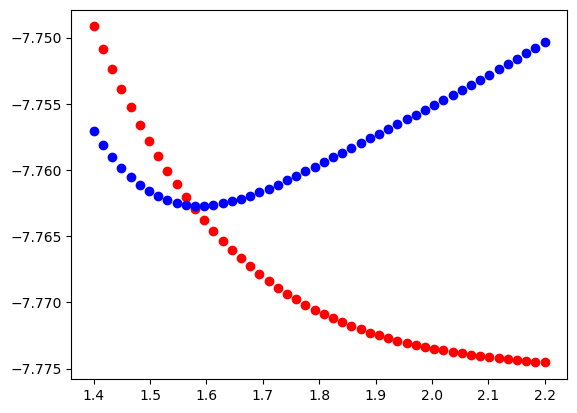

In [9]:
plt.plot(r_array, E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, E_array[:,1], label="E1")
plt.plot(r_array, E_array[:,2], label="E2")
plt.show()


#plt.plot(r_array, sc_np1_E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, sc_np1_E_array[:,1], 'ro', label="E1")
plt.plot(r_array, sc_np1_E_array[:,2], 'bo', label="E2")
plt.show()

#plt.plot(r_array, sc_np6_E_array[:,0]+0.1208, label="E0")
plt.plot(r_array, sc_np6_E_array[:,1], 'ro', label="E1")
plt.plot(r_array, sc_np6_E_array[:,2], 'bo', label="E2")
plt.show()



\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [10]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF


def MAE(E, Ep):
    """
    function to return the mean absolute error of the approximate PES stored in Ep relative to 
    the exact PES stored in E
    """
    # get length
    _NR = len(E)
    
    # take element-by-element difference
    _diff = E - Ep
    
    # compute absolute value of differences
    _absdiff = np.abs(_diff)
    
    # return sum divided by _NR
    return np.sum(_absdiff) / _NR
                
            

        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [11]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
#omega_cav = 0.12086
#lambda_vector = np.array([0., 0., 0.08])
#N_el = 3
#N_ph = 2
omega_cav = 0.12086
lambda_vector = np.array([0, 0.0, 0.04])
N_el = 2
N_ph = 2

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
#print("H")
#print(_HPF)

_HPF_EDSE = np.array([
[-7.857786, -0.004725,  0.,       -0.011859],
[-0.004725, -7.729184, -0.011859,  0.      ],
[ 0.,       -0.011859, -7.736926, -0.004725],
[-0.011859,  0.,       -0.004725, -7.608324]
])


In [ ]:
print(_HPF[0,0]-_HPF_EDSE[0,0])

In [23]:
N_el = 70
N_ph = 7
pcqed_nel70_np7 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pcqed_nel70_np7[k,:] = pf_e



In [20]:
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

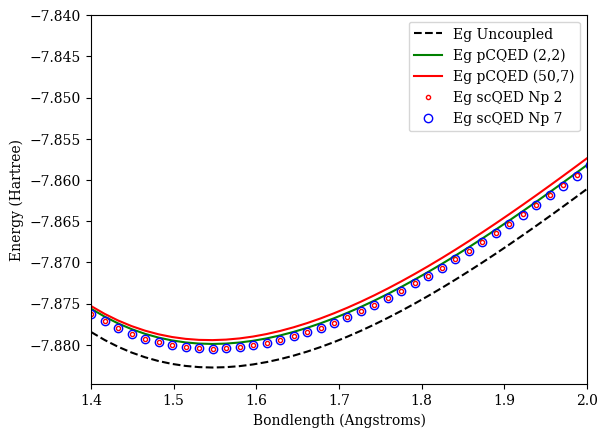

In [25]:
#plt.plot(r_array, Eg_QED_FCI_Np_1)
#sc_E_arrat_Np_6 = np.copy(sc_E_array)
plt.plot(r_array, E_array[:,0], 'black', linestyle="dashed", label="Eg Uncoupled")
plt.plot(r_array, pcqed_nel2_np2[:,0], 'green', label="Eg pCQED (2,2)")
plt.plot(r_array, pcqed_nel50_np7[:,0], 'red', label="Eg pCQED (50,7)")
#plt.plot(r_array, pcqed_nel70_np7[:,0], color='pink', linestyle='dashed', label="Eg pCQED (50,7)")
plt.plot(r_array, sc_np1_E_array[:,0], 'ro', ms = 3, mfc = 'none', label="Eg scQED Np 2")
plt.plot(r_array, sc_np6_E_array[:,0], 'bo', ms = 6, mfc = 'none', label="Eg scQED Np 7") # edgecolors='red')
plt.xlim(1.4, 2.0)
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
#plt.savefig("sto3g_lih_ground_state_lambda_04.png")
plt.show()


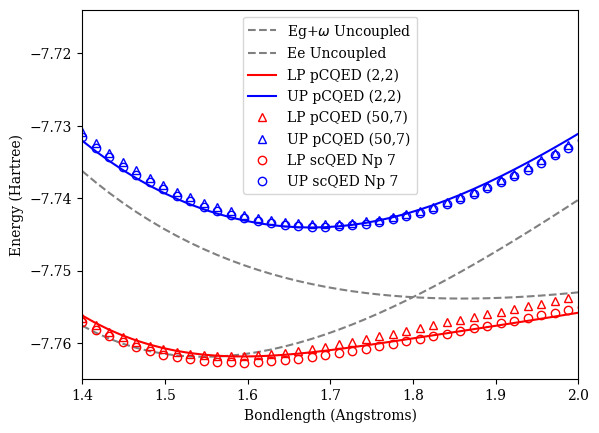

In [28]:
rcParams['font.size'] = 10
plt.plot(r_array, E_array[:,0]+0.12086, 'grey', linestyle="dashed", label="Eg+$\omega$ Uncoupled")
plt.plot(r_array, E_array[:,1], 'grey', linestyle="dashed", label="Ee Uncoupled")
plt.plot(r_array, pcqed_nel2_np2[:,1], 'red', label="LP pCQED (2,2)")
plt.plot(r_array, pcqed_nel2_np2[:,2], 'blue', label="UP pCQED (2,2)")
#plt.plot(r_array, pcqed_nel50_np7[:,1], 'r^', mfc = 'none', label="LP pCQED (50,7)")
#plt.plot(r_array, pcqed_nel50_np7[:,2], 'b^', mfc = 'none', label="UP pCQED (50,7)")
plt.plot(r_array, sc_np1_E_array[:,2], 'r^', mfc = 'none', label="LP pCQED (50,7)")
plt.plot(r_array, sc_np1_E_array[:,3], 'b^', mfc = 'none', label="UP pCQED (50,7)")
plt.plot(r_array, sc_np6_E_array[:,2], 'ro', ms = 6, mfc = 'none', label="LP scQED Np 7")
plt.plot(r_array, sc_np6_E_array[:,3], 'bo', ms = 6, mfc = 'none', label="UP scQED Np 7")
plt.xlim(1.4, 2.0)
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.savefig("sto3g_lih_lp_up_lambda_04.png")
plt.show()

In [ ]:
plt.plot(r_array, pcqed_nel50_np6[:,1], 'r--', label="LP pCQED (50,6)")
plt.plot(r_array, pcqed_nel50_np6[:,2], 'b--', label="UP pCQED (50,6)")
plt.plot(r_array, sc_E_arrat_Np_6[:,2], 'ro', label="LP CQED-FCI Np 6")
plt.plot(r_array, sc_E_arrat_Np_6[:,3], 'bo', label="UP CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

In [ ]:
for i in range(N_R):
    print(F'{r_array[i]}, {pf_array[i,0]}, {pf_array[i,1]}, {pf_array[i,2]}, {pf_array[i,3]}, {pf_array[i,3]} ')
      